<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/Shikhar_MIMICiv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df_patients = pd.read_csv('/content/gdrive/MyDrive/mimic-iv/patients.csv.gz')
df_patients

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN
...,...,...,...,...,...,...
299772,19999828,F,46,2147,2017 - 2019,NaN
299773,19999829,F,28,2186,2008 - 2010,NaN
299774,19999840,M,58,2164,2008 - 2010,2164-09-17
299775,19999914,F,49,2158,2017 - 2019,NaN


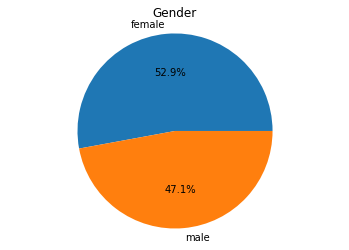

In [7]:
#breakdown of gender
#descriptive visualization
import matplotlib.pyplot as plt
import numpy as np

my_data = df_patients['gender'].value_counts(normalize=True)*100
my_labels = 'female', 'male'
explode = (0.1,0.1)
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('Gender')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Approx age distribution of the patients')

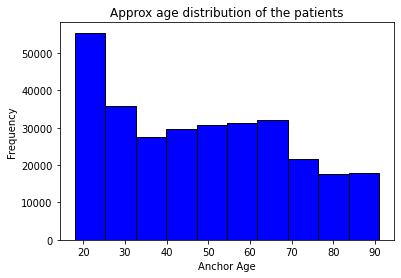

In [13]:
plt.hist(df_patients['anchor_age'], color='blue', edgecolor='black')
plt.xlabel('Anchor Age')
plt.ylabel('Frequency')
plt.title('Approx age distribution of the patients')

The histogram only for the rows in df_patients where the dod (date of death) is not null, which means the rows where the patient has a recorded date of death. This is indicated by the expression df_patients['dod'].notnull(), which returns a boolean mask indicating which rows satisfy the condition.

The final result is a histogram showing the distribution of anchor_age values among patients who have a recorded date of death.

(array([ 220.,  351.,  457., 1077., 2016., 3054., 4580., 4500., 5226.,
        7607.]),
 array([18. , 25.3, 32.6, 39.9, 47.2, 54.5, 61.8, 69.1, 76.4, 83.7, 91. ]),
 <a list of 10 Patch objects>)

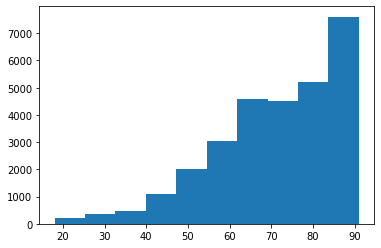

In [14]:
# approx age distribution of dead patients
plt.hist(df_patients[df_patients['dod'].notnull()]['anchor_age'])

In [15]:
df_admissions = pd.read_csv('/content/gdrive/MyDrive/mimic-iv/admissions.csv.gz')
df_admissions

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431083,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,NaN,EW EMER.,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2149-01-08 09:11:00,2149-01-08 18:12:00,0
431084,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,NaN,EW EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2147-07-17 17:18:00,2147-07-18 17:34:00,0
431085,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,EMERGENCY ROOM,DIED,Other,ENGLISH,WIDOWED,WHITE,2164-09-10 11:09:00,2164-09-10 14:46:00,1
431086,19999840,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Other,ENGLISH,WIDOWED,WHITE,2164-07-24 21:16:00,2164-07-25 01:20:00,0


In [16]:
df_admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431088 entries, 0 to 431087
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   subject_id            431088 non-null  int64 
 1   hadm_id               431088 non-null  int64 
 2   admittime             431088 non-null  object
 3   dischtime             431088 non-null  object
 4   deathtime             8625 non-null    object
 5   admission_type        431088 non-null  object
 6   admission_location    431088 non-null  object
 7   discharge_location    311774 non-null  object
 8   insurance             431088 non-null  object
 9   language              431088 non-null  object
 10  marital_status        421868 non-null  object
 11  race                  431088 non-null  object
 12  edregtime             299260 non-null  object
 13  edouttime             299260 non-null  object
 14  hospital_expire_flag  431088 non-null  int64 
dtypes: int64(3), obje

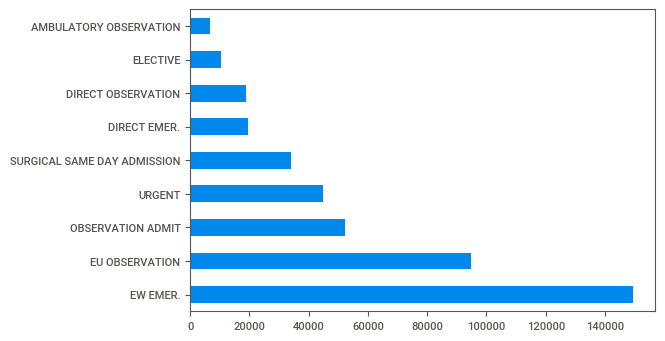

In [26]:
# Bar chart of admission types
df_admissions['admission_type'].value_counts().plot(kind='barh')

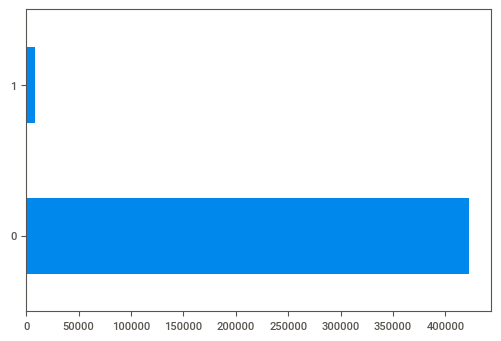

In [46]:
# Bar chart of admission types
df_admissions['hospital_expire_flag'].value_counts().plot(kind='barh')

# 0 - survival to hospital discharge
# 1 - death in the hospital


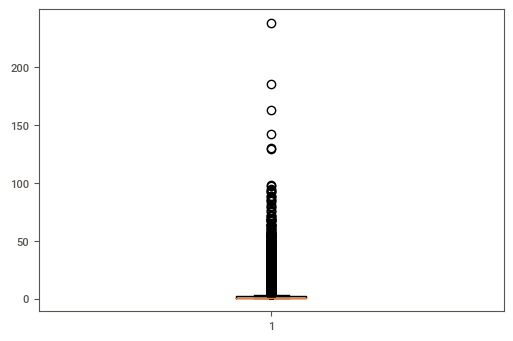

In [29]:
# distribution for admissions per patients
plt.boxplot(df_admissions.groupby('subject_id')['hadm_id'].size());

In [30]:
import numpy as np
df_sub_race = df_admissions[['subject_id','race']].drop_duplicates(subset=['subject_id'])

In [31]:
# Combine races
df_sub_race['race'] = df_sub_race['race'].str.replace(r'(WHITE.*)','WHITE', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace(r'(BLACK.*)','BLACK', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace(r'(ASIAN.*)','ASIAN', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace(r'(HISPANIC.*)','HISPANIC/LATINO', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace('UNABLE TO OBTAIN','UNKNOWN', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace('PATIENT DECLINED TO ANSWER','UNKNOWN', regex=True)
df_simplified_race = df_sub_race['race'].value_counts().reset_index()
df_simplified_race.columns = ['race', 'counts']
df_simplified_race

,race,counts
0,WHITE,120808
1,BLACK,23459
2,UNKNOWN,10113
3,HISPANIC/LATINO,9761
4,ASIAN,7552
5,OTHER,7464
6,PORTUGUESE,500
7,AMERICAN INDIAN/ALASKA NATIVE,387
8,MULTIPLE RACE/ETHNICITY,252
9,SOUTH AMERICAN,240


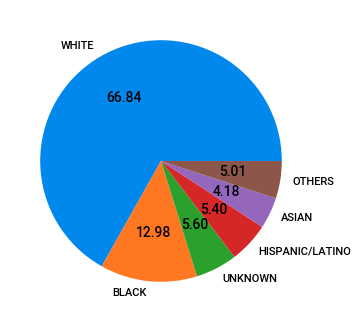

In [32]:
pd.options.mode.chained_assignment = None
if df_simplified_race['race'].str.contains('OTHERS').any()==False:
  df_simplified_race.iloc[5] = df_simplified_race.iloc[5:].sum()
  df_simplified_race['race'][5] = 'OTHERS'

plt.pie(df_simplified_race['counts'][:6], labels=df_simplified_race['race'][:6], autopct='%.2f');

Calculating the length of stay, first to convert these columns to datetime objects using the to_datetime() function, and then subtract the admission date from the discharge date to get the difference in days. (as length_of_stay)

In [35]:
df_admissions['admittime'] = pd.to_datetime(df_admissions['admittime'])
df_admissions['dischtime'] = pd.to_datetime(df_admissions['dischtime'])
df_admissions['length_of_stay'] = df_admissions['dischtime'] - df_admissions['admittime']
df_admissions['length_of_stay'] = df_admissions['length_of_stay'].dt.days

In [36]:
df_admissions.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,length_of_stay,los
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0,0,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0,1,1
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0,1,1
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0,2,2
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0,0,0


In [37]:
#The mean length of stay
df_admissions['length_of_stay'].mean()

3.942130145121182

In [38]:
df_merged = pd.merge(df_patients[['subject_id','gender','anchor_age']], df_admissions[['subject_id','hadm_id','los','admission_type','insurance','marital_status','race','hospital_expire_flag']], on='subject_id', how='inner')
df_merged

,subject_id,gender,anchor_age,hadm_id,los,admission_type,insurance,marital_status,race,hospital_expire_flag
0,10000032,F,52,22595853,0,URGENT,Other,WIDOWED,WHITE,0
1,10000032,F,52,22841357,1,EW EMER.,Medicaid,WIDOWED,WHITE,0
2,10000032,F,52,25742920,1,EW EMER.,Medicaid,WIDOWED,WHITE,0
3,10000032,F,52,29079034,2,EW EMER.,Medicaid,WIDOWED,WHITE,0
4,10000068,F,19,25022803,0,EU OBSERVATION,Other,SINGLE,WHITE,0
...,...,...,...,...,...,...,...,...,...,...
431083,19999828,F,46,25744818,10,EW EMER.,Other,SINGLE,WHITE,0
431084,19999828,F,46,29734428,17,EW EMER.,Other,SINGLE,WHITE,0
431085,19999840,M,58,21033226,6,EW EMER.,Other,WIDOWED,WHITE,1
431086,19999840,M,58,26071774,3,EW EMER.,Other,WIDOWED,WHITE,0
